In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
student_math1 = pd.read_csv("/content/drive/MyDrive/Kaggle_1/portpguse/student_math.csv")
student_por = pd.read_csv("/content/drive/MyDrive/Kaggle_1/portpguse/student_por.csv")

# EDA

## Data Undertanding

In [ ]:
student_math1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Merging above files to a final csv file

In [ ]:
import pandas as pd

# Load the first CSV file into a DataFrame
df1 = student_math1

# Load the second CSV file into another DataFrame
df2 = student_por
# Concatenate the two DataFrames vertically (along the rows)
merged_df = pd.concat([df1, df2],ignore_index = True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('/content/drive/MyDrive/Kaggle_1/portpguse/merged_file.csv', index=False)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

## Data Cleaning

Checking for duplicate rows other than the G1, G2, & G3 Columns

In [ ]:
df = merged_df

# Identify duplicates based on all columns except G1, G2, G3
duplicates = df[df.duplicated(subset=df.columns.difference(['G1', 'G2', 'G3']), keep=False)]

# Group by all columns except G1, G2, and G3 to keep distinct rows for duplicates
unique_rows = duplicates.groupby(list(df.columns.difference(['G1', 'G2', 'G3']))).first().reset_index()

# Drop the original duplicates from the dataframe and concatenate the unique rows
df_cleaned = pd.concat([df.drop(duplicates.index), unique_rows], ignore_index=True)

# Print the cleaned dataframe
print("Cleaned DataFrame:")
print(df_cleaned.info())


Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1005 non-null   object
 1   sex         1005 non-null   object
 2   age         1005 non-null   int64 
 3   address     1005 non-null   object
 4   famsize     1005 non-null   object
 5   Pstatus     1005 non-null   object
 6   Medu        1005 non-null   int64 
 7   Fedu        1005 non-null   int64 
 8   Mjob        1005 non-null   object
 9   Fjob        1005 non-null   object
 10  reason      1005 non-null   object
 11  guardian    1005 non-null   object
 12  traveltime  1005 non-null   int64 
 13  studytime   1005 non-null   int64 
 14  failures    1005 non-null   int64 
 15  schoolsup   1005 non-null   object
 16  famsup      1005 non-null   object
 17  paid        1005 non-null   object
 18  activities  1005 non-null   object
 19  nursery     1005 non-null   o

In [ ]:
merged_df1 = merged_df.drop(columns= {'G1', 'G2', 'G3'})
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Checking for duplicate rows, i.e is there a student who is taking both Maths & Portuguese. (G1, G2, G3 marks may be different)

In [ ]:
df = merged_df1
# Check for duplicate rows
duplicates = df[df.duplicated(keep='first')]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicates.info())


Duplicate Rows:
<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 401 to 1034
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      39 non-null     object
 1   sex         39 non-null     object
 2   age         39 non-null     int64 
 3   address     39 non-null     object
 4   famsize     39 non-null     object
 5   Pstatus     39 non-null     object
 6   Medu        39 non-null     int64 
 7   Fedu        39 non-null     int64 
 8   Mjob        39 non-null     object
 9   Fjob        39 non-null     object
 10  reason      39 non-null     object
 11  guardian    39 non-null     object
 12  traveltime  39 non-null     int64 
 13  studytime   39 non-null     int64 
 14  failures    39 non-null     int64 
 15  schoolsup   39 non-null     object
 16  famsup      39 non-null     object
 17  paid        39 non-null     object
 18  activities  39 non-null     object
 19  nursery     39 non-null     object
 2

Saving the final dataset to be used for Model Calssification.

In [ ]:
# Save the Final dataset to be used for Model Calssifiaction
df_cleaned.to_csv('/content/drive/MyDrive/Kaggle_1/portpguse/df_cleaned.csv', index=False)

In [ ]:
import pandas as pd
# assume student_math  = final_merged_file, as we have earlier computed for student_math,
student_math = pd.read_csv('/content/drive/MyDrive/Kaggle_1/portpguse/df_cleaned.csv')

## Descriptive Statistics

In [ ]:
student_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1005 non-null   object
 1   sex         1005 non-null   object
 2   age         1005 non-null   int64 
 3   address     1005 non-null   object
 4   famsize     1005 non-null   object
 5   Pstatus     1005 non-null   object
 6   Medu        1005 non-null   int64 
 7   Fedu        1005 non-null   int64 
 8   Mjob        1005 non-null   object
 9   Fjob        1005 non-null   object
 10  reason      1005 non-null   object
 11  guardian    1005 non-null   object
 12  traveltime  1005 non-null   int64 
 13  studytime   1005 non-null   int64 
 14  failures    1005 non-null   int64 
 15  schoolsup   1005 non-null   object
 16  famsup      1005 non-null   object
 17  paid        1005 non-null   object
 18  activities  1005 non-null   object
 19  nursery     1005 non-null   object
 20  higher  

In [ ]:
student_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1005.000000,1005.000000,1005.00000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,16.743284,2.600995,2.38408,1.528358,1.970149,0.267662,3.924378,3.194030,3.172139,1.500498,2.291542,3.550249,4.521393,11.172139,11.204975,11.293532
std,1.236790,1.120703,1.10041,0.733682,0.834457,0.659741,0.937410,1.036757,1.154076,0.920792,1.281021,1.424289,6.275132,2.983891,3.305461,3.883309
min,15.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.00000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.00000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.00000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.00000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
object_columns = student_math.select_dtypes(include=['object'])

In [ ]:
object_columns

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,GP,M,U,LE3,T,teacher,other,home,other,no,yes,no,no,no,yes,yes,yes
1001,GP,F,U,GT3,T,services,services,reputation,father,no,yes,no,yes,yes,yes,no,no
1002,MS,M,R,GT3,T,other,other,home,other,no,yes,no,no,yes,yes,yes,no
1003,GP,M,U,LE3,T,at_home,other,course,mother,no,no,no,yes,yes,yes,no,yes


One-hot-encoding to the object columns, & applying SMOTE oversampling for class imbalancing on X & target column.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
df = student_math

# Identify categorical columns in your DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = encoder.fit_transform(df[categorical_columns])

# Convert the one-hot encoded array into a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns from the DataFrame
df = df.drop(categorical_columns, axis=1)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, onehot_encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1005 non-null   int64  
 1   Medu               1005 non-null   int64  
 2   Fedu               1005 non-null   int64  
 3   traveltime         1005 non-null   int64  
 4   studytime          1005 non-null   int64  
 5   failures           1005 non-null   int64  
 6   famrel             1005 non-null   int64  
 7   freetime           1005 non-null   int64  
 8   goout              1005 non-null   int64  
 9   Dalc               1005 non-null   int64  
 10  Walc               1005 non-null   int64  
 11  health             1005 non-null   int64  
 12  absences           1005 non-null   int64  
 13  G1                 1005 non-null   int64  
 14  G2                 1005 non-null   int64  
 15  G3                 1005 non-null   int64  
 16  school_MS          1005 

In [ ]:
cols = df_encoded.columns
for i in cols:
  unique_counts = df_encoded[i].value_counts()
  print( i, ": ", unique_counts)
  print("")

age :  age
16    274
17    267
18    217
15    179
19     54
20      9
21      3
22      2
Name: count, dtype: int64

Medu :  Medu
4    291
2    278
3    233
1    195
0      8
Name: count, dtype: int64

Fedu :  Fedu
2    313
1    247
3    221
4    215
0      9
Name: count, dtype: int64

traveltime :  traveltime
1    595
2    313
3     73
4     24
Name: count, dtype: int64

studytime :  studytime
2    485
1    305
3    155
4     60
Name: count, dtype: int64

failures :  failures
0    827
1    116
2     33
3     29
Name: count, dtype: int64

famrel :  famrel
4    495
5    270
3    164
2     46
1     30
Name: count, dtype: int64

freetime :  freetime
3    392
4    278
2    167
5    105
1     63
Name: count, dtype: int64

goout :  goout
3    322
2    235
4    220
5    161
1     67
Name: count, dtype: int64

Dalc :  Dalc
1    698
2    189
3     66
5     26
4     26
Name: count, dtype: int64

Walc :  Walc
1    377
2    231
3    194
4    133
5     70
Name: count, dtype: int64

health :  healt

In [ ]:
df_encoded.isnull().sum()

,0
age,0
Medu,0
Fedu,0
traveltime,0
studytime,0
failures,0
famrel,0
freetime,0
goout,0
Dalc,0


In [ ]:
df = df_encoded
df.fillna(df.mean(), inplace=True)

Feature Scaling (Standardization/Normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [ ]:
df_scaled

In [ ]:

# Convert the NumPy array to a Pandas DataFrame
df4 = pd.DataFrame(df_scaled, columns=df_encoded.columns)

# Save the DataFrame to a CSV file
df4.to_csv('/content/drive/MyDrive/Kaggle_1/portpguse/df_scaled.csv', index=False)
#print("NumPy array saved to 'output.csv'")


# Model selection (K-mean Clustering)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)  # Choose 3 clusters for now
clusters = kmeans.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
clusters

array([1, 1, 3, ..., 0, 3, 2], dtype=int32)

Basic 2D Visualization (for two features

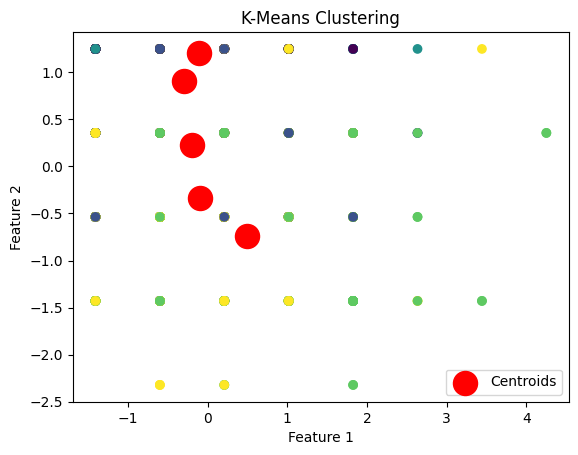

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_scaled is a 2D dataset
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Visualizing Clusters using PCA (for high-dimensional data)

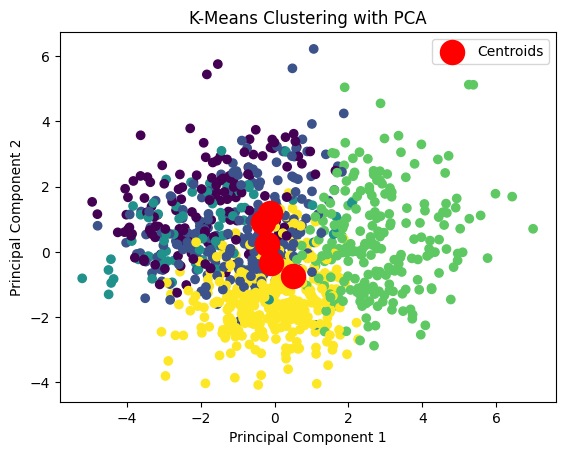

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the 2D PCA-transformed data with clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Visualizing Clusters using t-SNE (for non-linear dimensionality reduction)

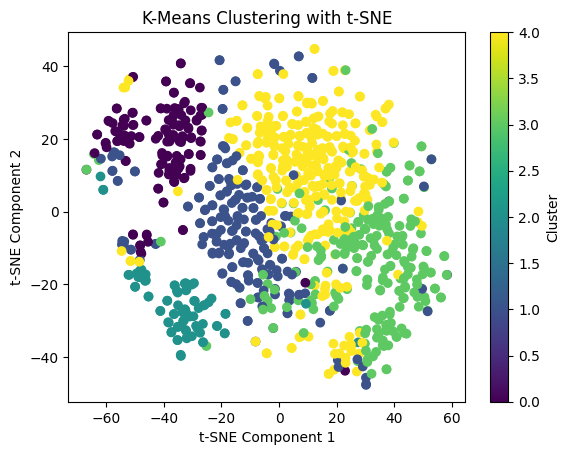

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce the data to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Plot the 2D t-SNE-transformed data with clusters
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


Save the t-SNE results and clusters to a CSV file:

In [ ]:

# Create a DataFrame with t-SNE components and cluster labels
tsne_df = pd.DataFrame(df_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Cluster'] = clusters

# Save the DataFrame to a CSV file
tsne_df.to_csv('/content/drive/MyDrive/Kaggle_1/portpguse/tsne_clusters.csv', index=False)

Save the K-Means model

In [ ]:
import joblib

# Save the trained K-Means model
joblib.dump(kmeans, '/content/drive/MyDrive/Kaggle_1/portpguse/kmeans_model.pkl')

#print("K-Means model saved to kmeans_model.pkl")


['/content/drive/MyDrive/Kaggle_1/portpguse/kmeans_model.pkl']

Load the saved K-Means model:

In [ ]:
# Load the saved K-Means model
kmeans_loaded = joblib.load('/content/drive/MyDrive/Kaggle_1/portpguse/kmeans_model.pkl')


Example of predicting clusters for new student data:

In [ ]:
import numpy as np
import pandas as pd
df_scaled = pd.read_csv('/content/drive/MyDrive/Kaggle_1/portpguse/df_scaled.csv')
# df_scaled is a NumPy array, so use regular indexing to get the first row
new_student = df_scaled[0].reshape(1, -1)

# Predict the cluster for the new student (first row)
predicted_cluster = kmeans_loaded.predict(new_student)

print(f"The new student belongs to cluster {predicted_cluster[0]}")


The new student belongs to cluster 0


In [ ]:
predicted_cluster

array([0], dtype=int32)

# For simplicity, Allow Users to Input Only 7 Features to predict the concern student cluster.

Identify the 7 Key Features for Clustering

In [2]:
from sklearn.decomposition import PCA
import pandas as pd
df_scaled = pd.read_csv('/content/drive/MyDrive/Kaggle_1/portpguse/df_scaled.csv')

# Fit PCA on the scaled data
pca = PCA(n_components=7)  # We are interested in the top 7 components/features
pca.fit(df_scaled)

# Get the feature importance (principal components)
feature_importance = pd.DataFrame(pca.components_, columns=df_scaled.columns).T
feature_importance.columns = [f'PC{i+1}' for i in range(7)]

# Show the top contributing features for each principal component
top_features = feature_importance.abs().sum(axis=1).sort_values(ascending=False).head(7)
print("Top 7 features for clustering based on PCA:")
print(top_features)


Top 7 features for clustering based on PCA:
Fjob_services     1.338478
Fjob_other        1.252520
guardian_other    1.123461
Medu              1.109327
address_U         1.076425
goout             1.062771
G2                1.062685
dtype: float64


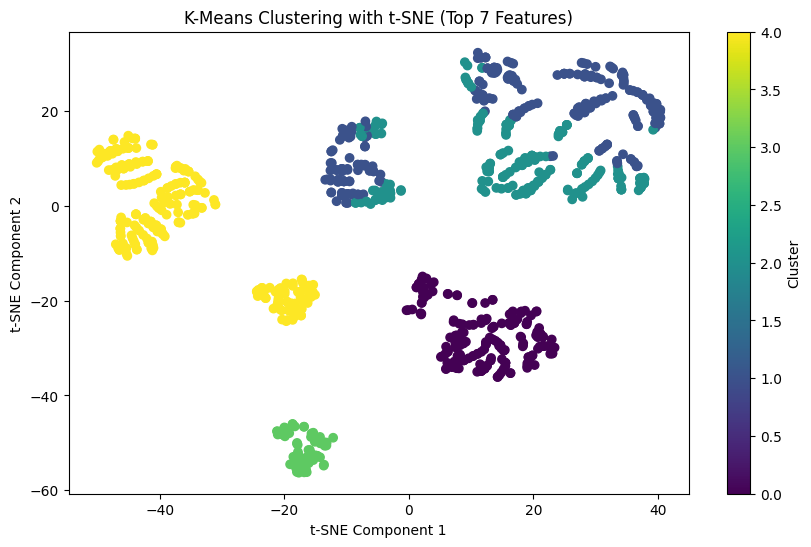

In [16]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'df_scaled' is your scaled dataset with all features
# Select the top 7 important features

important_features = ['Fjob_services', 'Fjob_other', 'guardian_other', 'Medu',
                      'address_U', 'goout', 'G2']

# Subset the scaled data to include only the top 7 features
df_reduced = df_scaled[important_features]

#save the df_reduced csv file to dataframe
df_reduced.to_csv('/content/drive/MyDrive/Kaggle_1/portpguse/df_reduced.csv', index=False)

# Step 1: Apply K-Means to the reduced data (7 features)
kmeans1 = KMeans(n_clusters=5, random_state=42)  # Assuming 3 clusters; change this if needed
clusters1 = kmeans1.fit_predict(df_reduced)

# Step 2: Apply t-SNE on the reduced data
tsne1 = TSNE(n_components=2, random_state=42)
df_tsne1 = tsne1.fit_transform(df_reduced)

# Step 3: Visualize the t-SNE-transformed data with clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne1[:, 0], df_tsne1[:, 1], c=clusters1, cmap='viridis')
plt.title('K-Means Clustering with t-SNE (Top 7 Features)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


Save the t-SNE results and clusters to a CSV file:

In [17]:

# Create a DataFrame with t-SNE components and cluster labels
tsne_df1 = pd.DataFrame(df_tsne1, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df1['Cluster'] = clusters1

# Save the DataFrame to a CSV file
tsne_df1.to_csv('/content/drive/MyDrive/Kaggle_1/portpguse/tsne_clusters1.csv', index=False)

Save the K-Means model

In [18]:
import joblib

# Save the trained K-Means model
joblib.dump(kmeans1, '/content/drive/MyDrive/Kaggle_1/portpguse/kmeans_model1.pkl')

#print("K-Means model saved to kmeans_model.pkl")


['/content/drive/MyDrive/Kaggle_1/portpguse/kmeans_model1.pkl']

Load the saved K-Means model:

In [19]:
# Load the saved K-Means model
kmeans_loaded1 = joblib.load('/content/drive/MyDrive/Kaggle_1/portpguse/kmeans_model1.pkl')


Example of predicting clusters for new student data:

In [23]:
import pandas as pd

df_reduced = pd.read_csv('/content/drive/MyDrive/Kaggle_1/portpguse/df_reduced.csv')

# df_scaled is a NumPy array, so use regular indexing to get the first row
new_student1 = df_reduced.iloc[0].values.reshape(1, -1)

# Predict the cluster for the new student (first row)
predicted_cluster1 = kmeans_loaded1.predict(new_student1)

print(f"The new student belongs to cluster {predicted_cluster1[0]}")


The new student belongs to cluster 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
